In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras import optimizers,utils
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from random import shuffle
import cv2
import imageio
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
# import the module
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from numpy import argmax
from sklearn.metrics import r2_score
import tensorflow as tf
import numpy as np # linear algebra
from sklearn.metrics import r2_score

# classification mlp model for the abalone dataset
from numpy import unique
from numpy import argmax
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import imageio
import os
import seaborn as sns
from PIL import Image
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential

from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
import math  

from tensorflow.keras.utils import plot_model

In [2]:
# changing dir and loading images in the folder

filepath = "C:\\Users\\CyberOps\\agubalanceface"
os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)

6840

6840
21: 380
23: 380
17: 380
26: 380
30: 380
29: 380
20: 380
22: 380
15: 380
13: 380
25: 380
14: 380
28: 380
27: 380
19: 380
24: 380
18: 380
16: 380


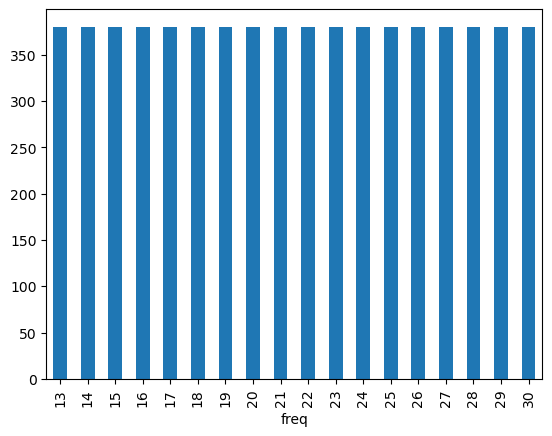

freq
0   21
1   23
2   17
3   26
4   30

In [5]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [6]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

C:\Users\CyberOps\AppData\Local\Temp\ipykernel_16972\2699070946.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ages = pd.Series(ages, name='Age').astype(np.int)


In [6]:
df.head()


freq
0   14
1   28
2   23
3   24
4   29

Age: 20


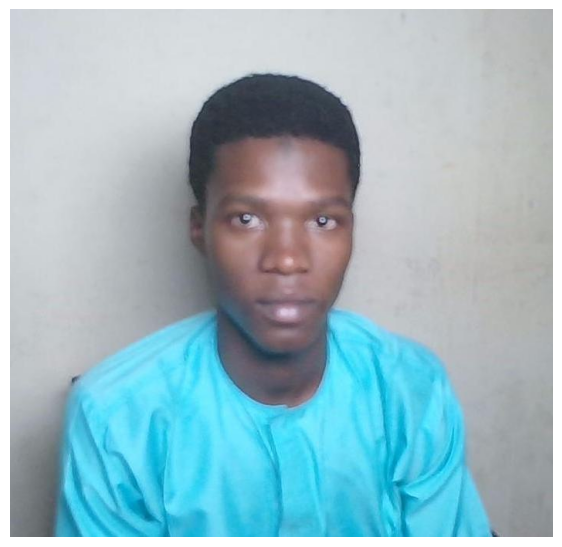

In [7]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

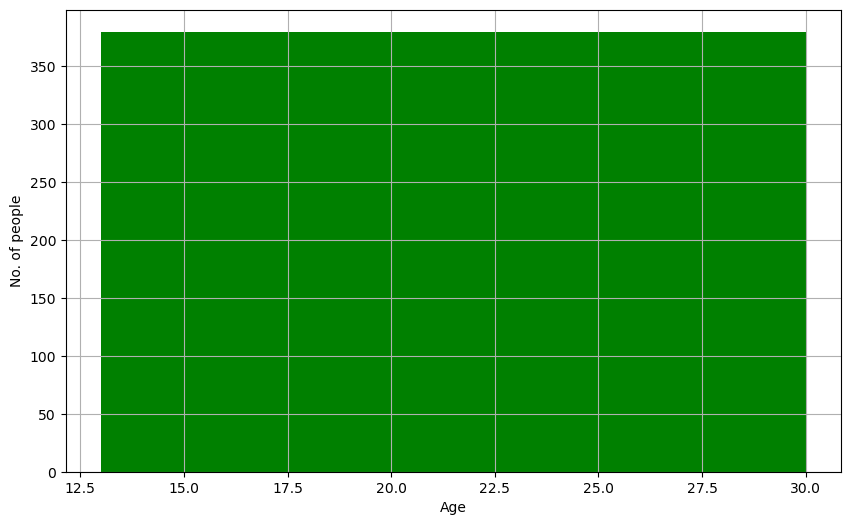

In [8]:

df = ages.to_frame(name="age")

df['age'].hist(bins=df['age'].nunique(),color='g',figsize=(10,6))  

# Pretty obvious that a large chunk of population in training data is from 20 to 60. Sort of bell-shaped curve (Gaussian Distribution)-   very non uniform

plt.xlabel('Age')
plt.ylabel('No. of people')
plt.show()

In [12]:

classes = []
for i in ages:
      i = int(i)
         
      if (i>=13) and (i<=17):
          classes.append(0)      
      if (i>=18) and (i<=25):
          classes.append(1)       
      if (i>=26) and (i<=30):
          classes.append(2)
     
     
            
            
            
classes[:3]

print(len(classes))

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

6840


(6840, 3)

In [7]:
agelabel=np.array(ages)

type(agelabel)

numpy.ndarray

In [8]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255


C:\Users\CyberOps\AppData\Local\Temp\ipykernel_16972\3179156042.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [10]:

imagesize =X.shape[1]
X.shape 

(6840, 224, 224, 3)

In [13]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_reg, y_test_reg, y_train_class, y_test_class  = train_test_split(X, agelabel,categorical_labels, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val_reg, y_test_reg,y_val_class, y_test_class= train_test_split(x_test, y_test_reg, y_test_class,test_size=test_ratio/(test_ratio + validation_ratio)) 

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_reg.shape, "validation Label Size",y_val_reg.shape, "Testing Image Size",y_test_reg.shape)
print("Training Label Size",y_train_class.shape, "validation Label Size",y_val_class.shape, "Testing Image Size",y_test_class.shape)


Training Image Size (4787, 224, 224, 3)  Validation Image Size (1368, 224, 224, 3) Testing Image Size  (685, 224, 224, 3)
Training Label Size (4787,) validation Label Size (1368,) Testing Image Size (685,)
Training Label Size (4787, 3) validation Label Size (1368, 3) Testing Image Size (685, 3)


In [15]:

inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model= Flatten()(model)
model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)
model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)
model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)
model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)
reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)
cla_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)
age_net = Model(inputs=inputs, outputs=[reg_cnn, cla_cnn])
age_net.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [15]:
X.shape

(6840, 224, 224, 3)

In [19]:

agelabel=images.Age
y_class = LabelEncoder().fit_transform(agelabel)
n_class = len(unique(y_class))


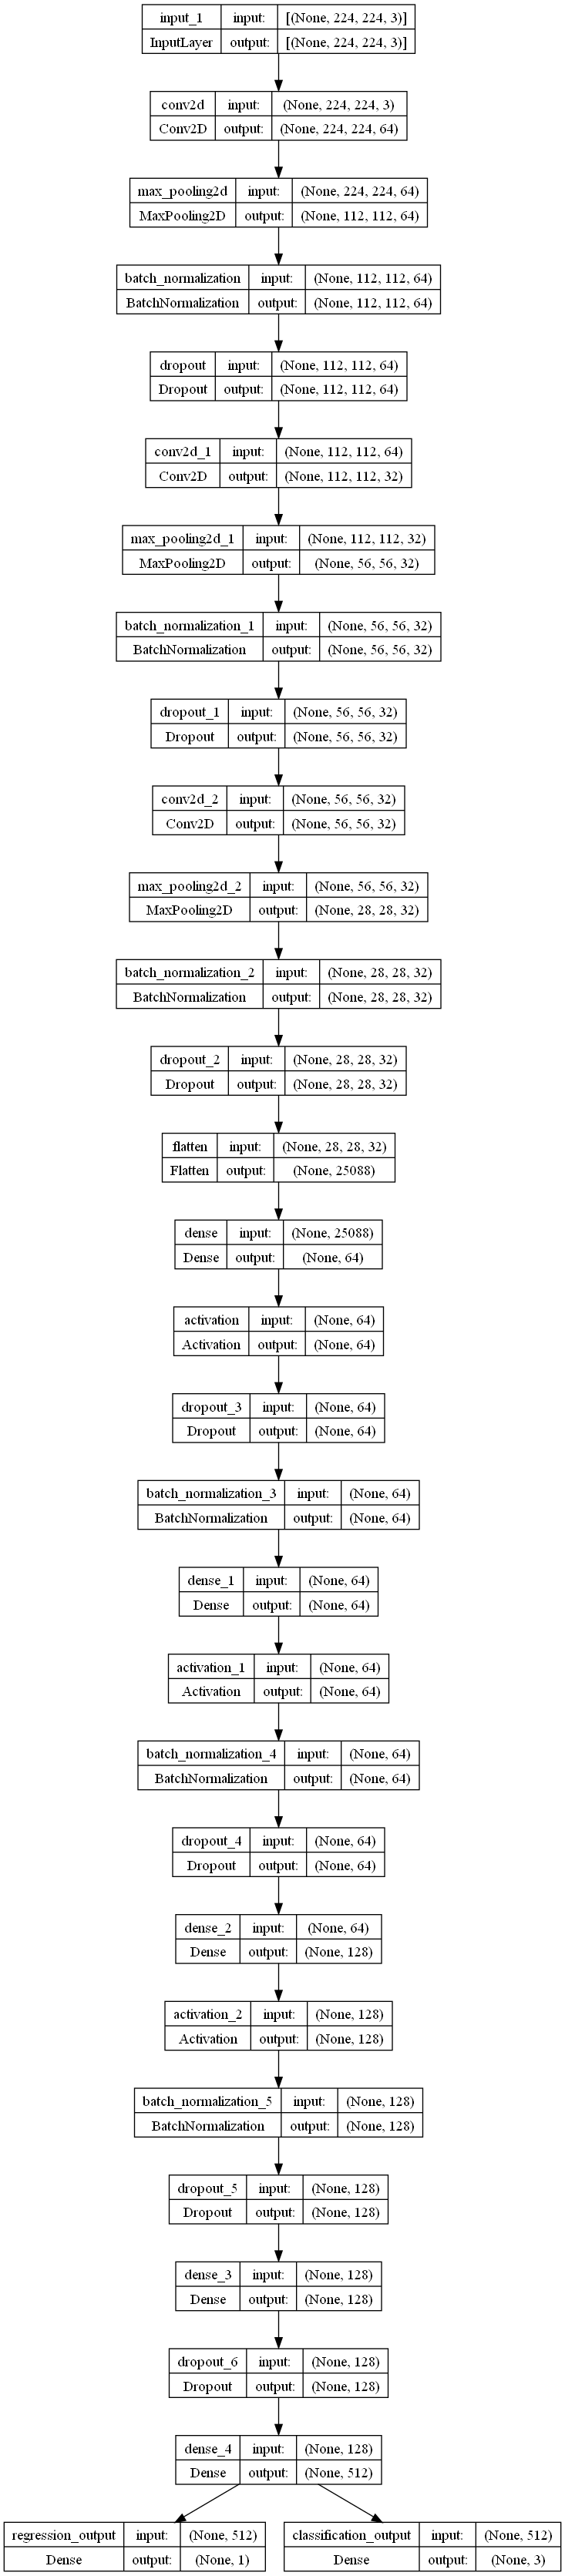

In [15]:
plot_model(age_net, to_file='/model/model.png', show_shapes=True)

In [20]:

from keras.models import load_model
age_net=load_model('/model/agenet.h5')




n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history_x = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet.h5', verbose=1, save_best_only=True)

  model_history_x=age_net.fit(x_train, [y_train_reg,y_train_class],validation_data=(x_val,[y_val_reg,y_val_class]), epochs=50, batch_size=32,verbose=2,callbacks=[early_stopping, model_checkpoint],shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50

Epoch 1: val_loss improved from inf to 2.56663, saving model to /model\agenet.h5
150/150 - 266s - loss: 3.5096 - regression_output_loss: 3.1975 - classification_output_loss: 0.3121 - regression_output_mae: 1.1972 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1070 - classification_output_accuracy: 0.8899 - val_loss: 2.5666 - val_regression_output_loss: 2.3204 - val_classification_output_loss: 0.2462 - val_regression_output_mae: 1.0410 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1087 - val_classification_output_accuracy: 0.9313 - 266s/epoch - 2s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 2.56663
150/150 - 226s - loss: 3.4024 - regression_output_loss: 3.0993 - classification_output_loss: 0.3030 - regression_output_mae: 1.1905 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1097 - classification_output_accuracy: 0.8910 - val_loss: 2.9948 - val_regression_output_loss: 2.7337 - val_

Epoch 7/50

Epoch 7: val_loss did not improve from 1.72528
150/150 - 199s - loss: 2.9891 - regression_output_loss: 2.7130 - classification_output_loss: 0.2761 - regression_output_mae: 1.1283 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0998 - classification_output_accuracy: 0.8995 - val_loss: 3.2603 - val_regression_output_loss: 3.0397 - val_classification_output_loss: 0.2207 - val_regression_output_mae: 1.1246 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0909 - val_classification_output_accuracy: 0.9357 - 199s/epoch - 1s/step
Epoch 8/50

Epoch 8: val_loss did not improve from 1.72528
150/150 - 198s - loss: 3.1553 - regression_output_loss: 2.8676 - classification_output_loss: 0.2877 - regression_output_mae: 1.1521 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1012 - classification_output_accuracy: 0.8987 - val_loss: 5.9943 - val_regression_output_loss: 5.6123 - val_classification_output_loss: 0.3820


Epoch 1: val_loss improved from inf to 4.16006, saving model to /model\agenet.h5
150/150 - 198s - loss: 3.1998 - regression_output_loss: 2.9067 - classification_output_loss: 0.2931 - regression_output_mae: 1.1513 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1050 - classification_output_accuracy: 0.8951 - val_loss: 4.1601 - val_regression_output_loss: 3.9000 - val_classification_output_loss: 0.2601 - val_regression_output_mae: 1.2286 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1027 - val_classification_output_accuracy: 0.9298 - 198s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 4.16006 to 2.31542, saving model to /model\agenet.h5
150/150 - 198s - loss: 3.2590 - regression_output_loss: 2.9587 - classification_output_loss: 0.3003 - regression_output_mae: 1.1760 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1044 - classification_output_accuracy: 0.8916 - val_loss: 2.3154 - val_regression

Epoch 5/50

Epoch 5: val_loss did not improve from 1.60695
150/150 - 196s - loss: 2.8825 - regression_output_loss: 2.6098 - classification_output_loss: 0.2727 - regression_output_mae: 1.1083 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0960 - classification_output_accuracy: 0.9058 - val_loss: 4.1357 - val_regression_output_loss: 3.7949 - val_classification_output_loss: 0.3408 - val_regression_output_mae: 1.2836 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1166 - val_classification_output_accuracy: 0.8889 - 196s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 1.60695
150/150 - 197s - loss: 2.7963 - regression_output_loss: 2.5403 - classification_output_loss: 0.2560 - regression_output_mae: 1.1010 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0942 - classification_output_accuracy: 0.9087 - val_loss: 2.3325 - val_regression_output_loss: 2.1281 - val_classification_output_loss: 0.2044

Epoch 4/50

Epoch 4: val_loss did not improve from 2.04011
150/150 - 198s - loss: 3.2470 - regression_output_loss: 2.9607 - classification_output_loss: 0.2863 - regression_output_mae: 1.1879 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1093 - classification_output_accuracy: 0.8945 - val_loss: 3.0347 - val_regression_output_loss: 2.8138 - val_classification_output_loss: 0.2209 - val_regression_output_mae: 1.0973 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0957 - val_classification_output_accuracy: 0.9291 - 198s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 2.04011
150/150 - 197s - loss: 2.9293 - regression_output_loss: 2.6512 - classification_output_loss: 0.2781 - regression_output_mae: 1.1257 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0985 - classification_output_accuracy: 0.9016 - val_loss: 3.2830 - val_regression_output_loss: 3.0564 - val_classification_output_loss: 0.2266


Epoch 1: val_loss improved from inf to 8.21329, saving model to /model\agenet.h5
150/150 - 195s - loss: 3.3760 - regression_output_loss: 3.0880 - classification_output_loss: 0.2880 - regression_output_mae: 1.1716 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1007 - classification_output_accuracy: 0.8958 - val_loss: 8.2133 - val_regression_output_loss: 7.7043 - val_classification_output_loss: 0.5090 - val_regression_output_mae: 1.9511 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1601 - val_classification_output_accuracy: 0.8355 - 195s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 8.21329 to 4.75160, saving model to /model\agenet.h5
150/150 - 194s - loss: 4.3531 - regression_output_loss: 4.0061 - classification_output_loss: 0.3471 - regression_output_mae: 1.3658 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1230 - classification_output_accuracy: 0.8740 - val_loss: 4.7516 - val_regression

150/150 - 196s - loss: 2.5576 - regression_output_loss: 2.3264 - classification_output_loss: 0.2312 - regression_output_mae: 1.0311 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0831 - classification_output_accuracy: 0.9196 - val_loss: 1.9497 - val_regression_output_loss: 1.7840 - val_classification_output_loss: 0.1656 - val_regression_output_mae: 0.8753 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0733 - val_classification_output_accuracy: 0.9569 - 196s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 1.94967
150/150 - 195s - loss: 3.0402 - regression_output_loss: 2.7738 - classification_output_loss: 0.2663 - regression_output_mae: 1.1274 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0934 - classification_output_accuracy: 0.9006 - val_loss: 6.1836 - val_regression_output_loss: 5.8409 - val_classification_output_loss: 0.3428 - val_regression_output_mae: 1.5322 - val_regression_outpu

22/22 [==============================] - 6s 264ms/step
The MSE 2.220425456354612
The MAE 0.9569626480993563
this is the rmse 1.4901092095395598
Test R^2 Score: 0.92046
[[169  15   1]
 [  9 277   7]
 [  1   5 201]]
(685, 3)


<AxesSubplot:>

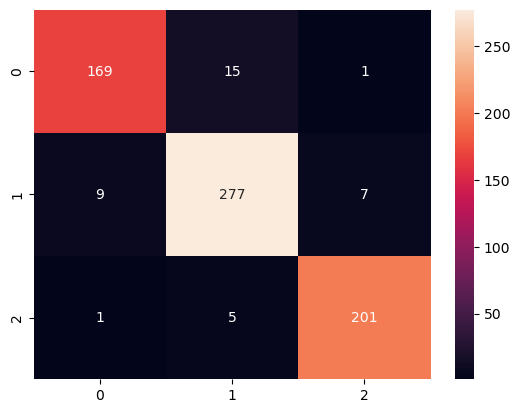

In [21]:
yhat1, yhat2 = age_net.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat1)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat1)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat1)
print("Test R^2 Score: {:.5f}".format(r2))




y_pred=np.argmax(yhat2, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat2.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)


In [22]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat2, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       185
           1       0.93      0.95      0.94       293
           2       0.96      0.97      0.97       207

    accuracy                           0.94       685
   macro avg       0.95      0.94      0.94       685
weighted avg       0.94      0.94      0.94       685



In [23]:
import statsmodels.api as sm
model = sm.OLS(true_ages ,yhat1)
results = model.fit()
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.546e+05
Date:                Wed, 20 Mar 2024   Prob (F-statistic):                        0.00
Time:                        20:52:57   Log-Likelihood:                         -1241.4
No. Observations:                 685   AIC:                                      2485.
Df Residuals:                     684   BIC:                                      2489.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:

xscore = age_net.evaluate(x_test, y_test_class, verbose = 0) 

print('Test loss:', xscore[5]) 
print('Test accuracy:', xscore[6])



Test loss: 0.08304986357688904
Test accuracy: 0.9445255398750305


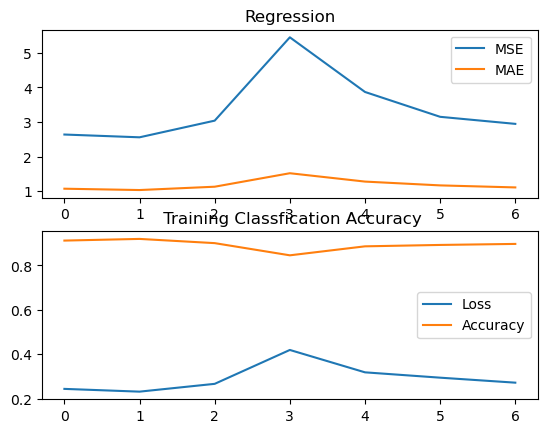

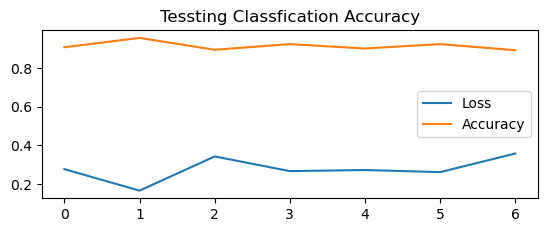

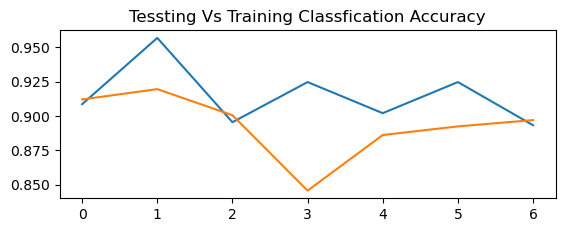

In [25]:
# plot loss during training
plt.title('Regression testing')
plt.subplot(211)
plt.title('Regression')
plt.plot(model_history_x.history['loss'], label='MSE')
#plt.plot(model_history.history[' regression_output_mae'], label='MAE')
plt.legend()
# plot loss during training
plt.subplot(211)

plt.plot(model_history_x.history['regression_output_mae'], label='MAE')
#plt.plot(model_history.history['val_regression_output_mae'], label='MAE')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title(' Training Classfication Accuracy')
plt.plot(model_history_x.history['classification_output_loss'], label='Loss')
plt.plot(model_history_x.history['classification_output_accuracy'], label='Accuracy')
plt.legend()
plt.show()

# plot accuracy testing 
plt.subplot(212)
plt.title('Tessting Classfication Accuracy')
plt.plot(model_history_x.history['val_classification_output_loss'], label='Loss')
plt.plot(model_history_x.history['val_classification_output_accuracy'], label='Accuracy')
plt.legend()
plt.show()


plt.subplot(212)
plt.title('Tessting Vs Training Classfication Accuracy')
plt.plot(model_history_x.history['val_classification_output_accuracy'], label='Val Accuracy')
plt.plot(model_history_x.history['classification_output_accuracy'], label='Accuracy')

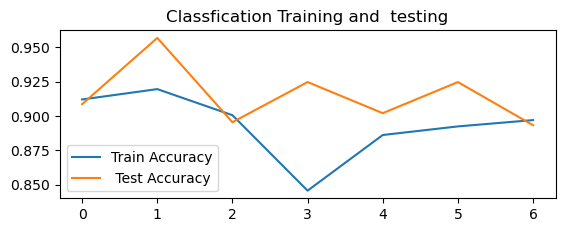

In [26]:

# plot accuracy testing 
plt.subplot(212)
plt.title('Classfication Training and  testing')
plt.plot(model_history_x.history['classification_output_accuracy'], label='Train Accuracy')
plt.plot(model_history_x.history['val_classification_output_accuracy'], label=' Test Accuracy')
plt.legend()
plt.show()


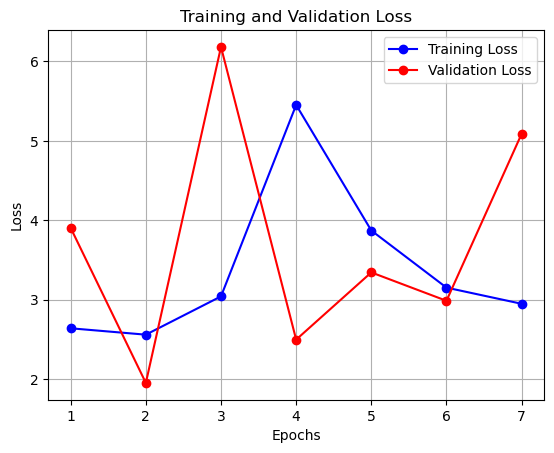

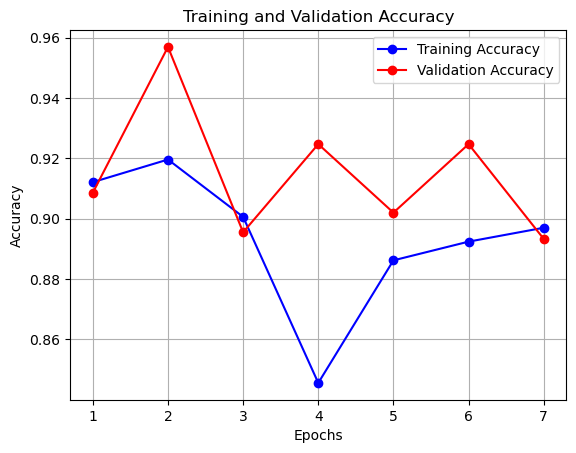

In [27]:
import matplotlib.pyplot as plt

# Training history data
history = {
    'loss': [2.6381, 2.5576, 3.0402, 5.4523, 3.8702, 3.1507, 2.9468],
    'val_loss': [3.9026, 1.94967, 6.1836, 2.4951, 3.3422, 2.9846, 5.0878],
    'accuracy': [0.9121, 0.9196, 0.9006, 0.8456, 0.8862, 0.8924, 0.8970],
    'val_accuracy': [0.9086, 0.9569, 0.8955, 0.9247, 0.9020, 0.9247, 0.8933]
}

epochs = range(1, len(history['loss']) + 1)

# Plotting loss
plt.plot(epochs, history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy
plt.plot(epochs, history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

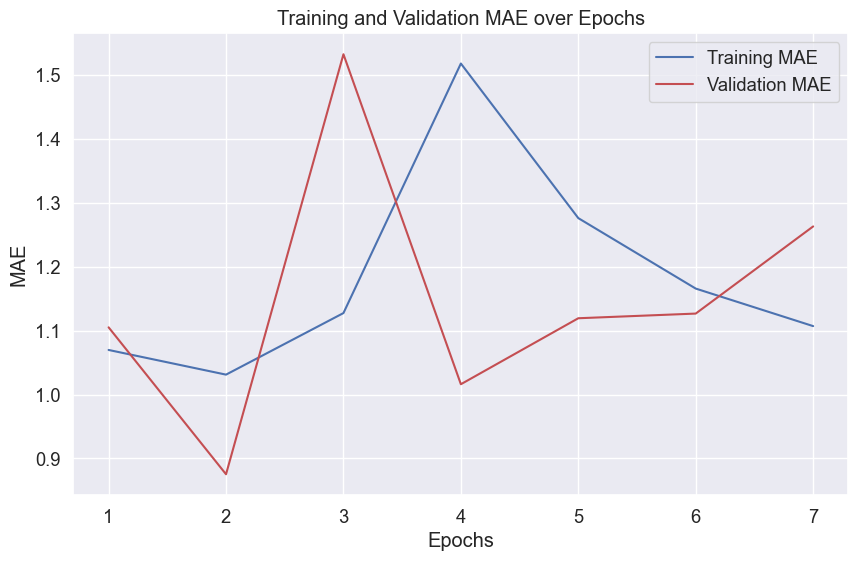

In [15]:
import matplotlib.pyplot as plt

# Training history data
epochs = range(1, 8)  # Assuming data for 7 epochs

train_mae_history = [1.0697, 1.0311, 1.1274, 1.5177, 1.2759, 1.1657, 1.1070]
val_mae_history = [1.1051, 0.8753, 1.5322, 1.0161, 1.1193, 1.1266, 1.2629]

# Plotting training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mae_history, 'b', label='Training MAE')
plt.plot(epochs, val_mae_history, 'r', label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.xticks(epochs)  # Set x-axis ticks to display epochs
plt.legend()
plt.grid(True)
plt.show()



In [23]:
inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)


model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)


model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)



model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)



age_net_reg = Model(inputs=inputs, outputs=reg_cnn)



age_net_reg.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      8224

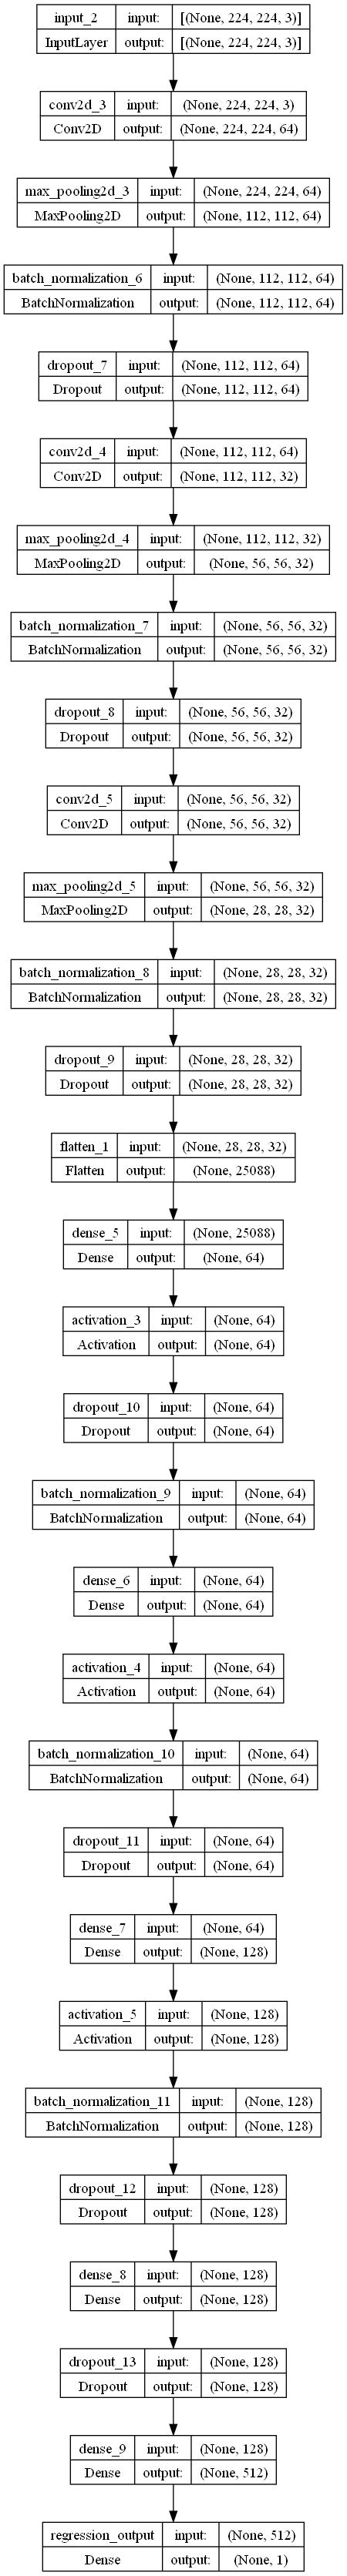

In [24]:
plot_model(age_net_reg, to_file='/model/age_net_reg.png', show_shapes=True)


In [28]:

from keras.models import load_model
age_net_reg=load_model('/model/agenet_reg.h5')





n_folds=10



#save the model history in a list after fitting so that we can plot leter
model_history_y = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet_reg.h5', verbose=1, save_best_only=True)
  model_history_y=age_net_reg.fit(x_train, y_train_reg, epochs=50, batch_size=32, verbose=2,callbacks=[early_stopping,model_checkpoint],validation_data=(x_val,y_val_reg) ,shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.63654, saving model to /model\agenet_reg.h5
150/150 - 198s - loss: 1.6808 - mae: 0.8078 - val_loss: 1.6365 - val_mae: 0.8340 - 198s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 1.63654 to 1.20865, saving model to /model\agenet_reg.h5
150/150 - 194s - loss: 1.5973 - mae: 0.7902 - val_loss: 1.2086 - val_mae: 0.6561 - 194s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss improved from 1.20865 to 0.92825, saving model to /model\agenet_reg.h5
150/150 - 194s - loss: 1.5260 - mae: 0.7803 - val_loss: 0.9282 - val_mae: 0.6299 - 194s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.92825 to 0.83404, saving model to /model\agenet_reg.h5
150/150 - 195s - loss: 1.3324 - mae: 0.7419 - val_loss: 0.8340 - val_mae: 0.5978 - 195s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.83404
150/150 - 194s - loss: 1.4670 - mae: 0.7656 - val_loss: 1.2498 - val_mae: 0.7188 - 194s/epoch - 1s/step
Epoch 6/50

Epoch 6: 


Epoch 1: val_loss improved from inf to 0.69593, saving model to /model\agenet_reg.h5
150/150 - 196s - loss: 1.1670 - mae: 0.7050 - val_loss: 0.6959 - val_mae: 0.5677 - 196s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.69593
150/150 - 196s - loss: 1.0835 - mae: 0.6797 - val_loss: 0.8986 - val_mae: 0.5995 - 196s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.69593
150/150 - 194s - loss: 1.0669 - mae: 0.6840 - val_loss: 1.0879 - val_mae: 0.6219 - 194s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.69593
150/150 - 196s - loss: 1.1701 - mae: 0.6825 - val_loss: 1.0629 - val_mae: 0.6948 - 196s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.69593
150/150 - 193s - loss: 1.1080 - mae: 0.6930 - val_loss: 1.0110 - val_mae: 0.6247 - 193s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 0.69593
150/150 - 196s - loss: 1.0296 - mae: 0.6733 - val_loss: 0.8862 - val_mae: 0.5773 - 196s/epoch - 1s/

Epoch 8/50

Epoch 8: val_loss did not improve from 0.81347
150/150 - 193s - loss: 1.0101 - mae: 0.6619 - val_loss: 1.3370 - val_mae: 0.6904 - 193s/epoch - 1s/step
Training on Fold:  10






In [29]:
yhat = age_net_reg.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net_reg.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat)
print("Test R^2 Score: {:.5f}".format(r2))


yhat.shape

22/22 [==============================] - 6s 259ms/step
The MSE 1.2196489133914872
The MAE 0.6584080410699775
this is the rmse 1.1043771608429283
Test R^2 Score: 0.95631


(685, 1)

In [30]:
import statsmodels.api as sm
model = sm.OLS(true_ages ,yhat)
results = model.fit()
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.800e+05
Date:                Thu, 21 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:28:44   Log-Likelihood:                         -1038.7
No. Observations:                 685   AIC:                                      2079.
Df Residuals:                     684   BIC:                                      2084.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

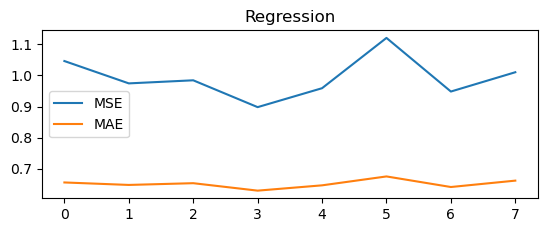

In [31]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Regression')
plt.plot(model_history_y.history['loss'], label='MSE')
plt.plot(model_history_y.history['mae'], label='MAE')
plt.legend()
# plot accuracy during training

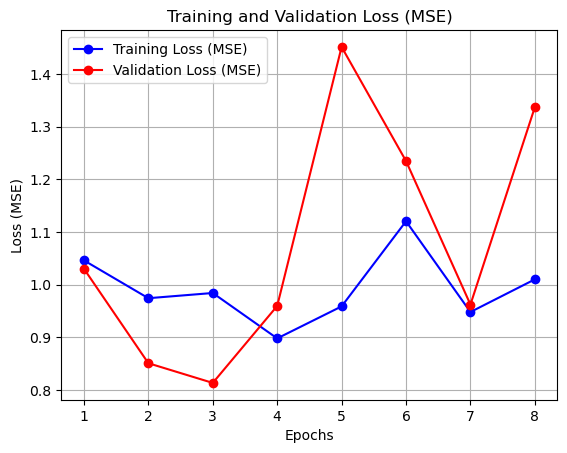

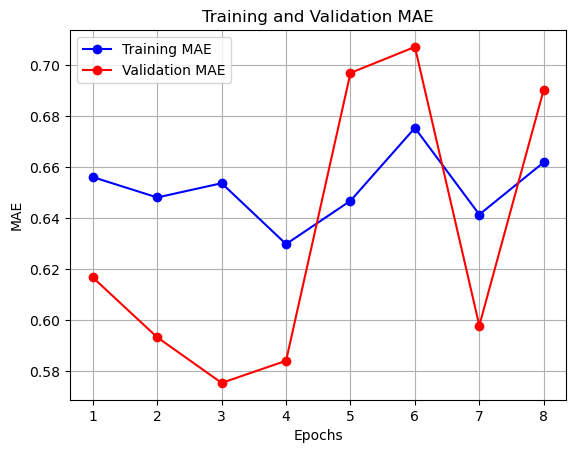

In [28]:
import matplotlib.pyplot as plt

# Training history data
history = {
    'loss': [1.0461, 0.9743, 0.9842, 0.8980, 0.9588, 1.1204, 0.9481, 1.0101],
    'val_loss': [1.0302, 0.8509, 0.8135, 0.9596, 1.4513, 1.2347, 0.9622, 1.3370],
    'mae': [0.6561, 0.6481, 0.6537, 0.6298, 0.6468, 0.6754, 0.6414, 0.6619],
    'val_mae': [0.6167, 0.5932, 0.5753, 0.5840, 0.6970, 0.7072, 0.5978, 0.6904]
}

epochs = range(1, len(history['loss']) + 1)

# Plotting loss (MSE)
plt.plot(epochs, history['loss'], 'bo-', label='Training Loss (MSE)')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss (MSE)')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MAE
plt.plot(epochs, history['mae'], 'bo-', label='Training MAE')
plt.plot(epochs, history['val_mae'], 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)


model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)


model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)



model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


class_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)



age_net_class = Model(inputs=inputs, outputs=class_cnn)



age_net_class.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224  

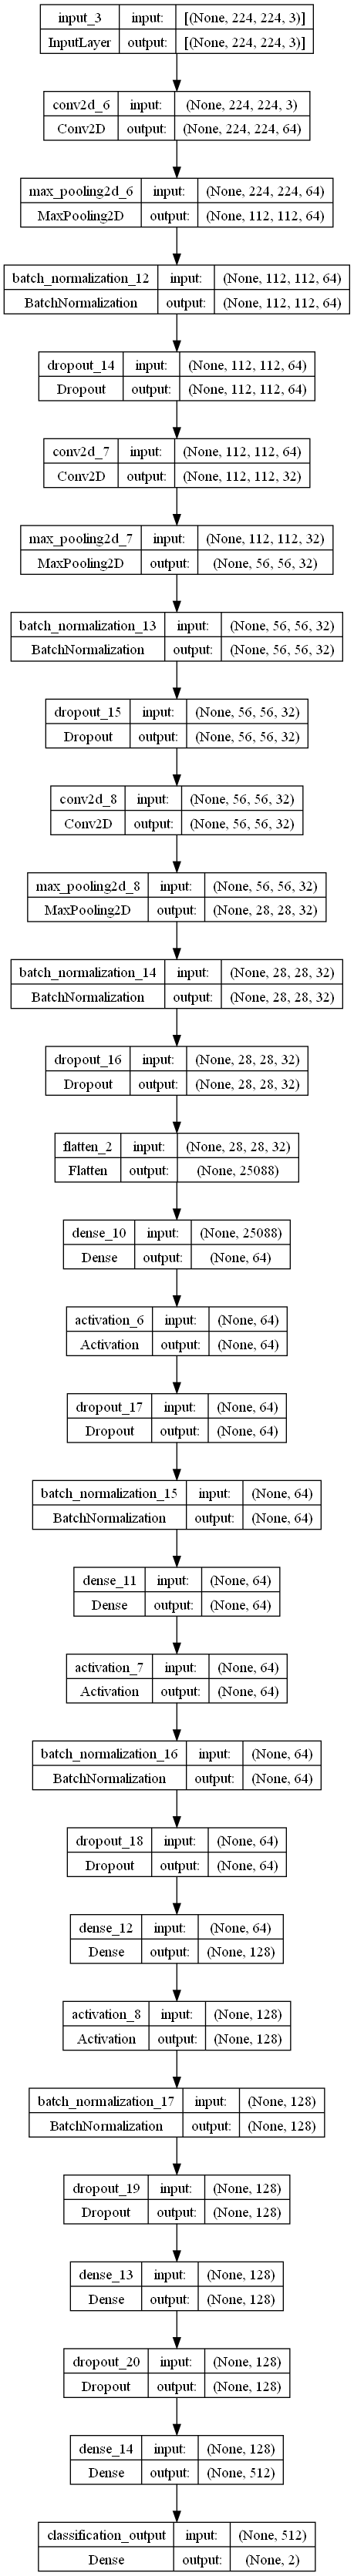

In [28]:
plot_model(age_net_class, to_file='/model/age_net_class.png', show_shapes=True)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

age_net_class.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=["accuracy"])


In [32]:
age_net_class=load_model('/model/agenet_class.h5')



n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history_z = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet_class.h5', verbose=1, save_best_only=True)
  model_history_z=age_net_class.fit(x_train, y_train_class, epochs=50, batch_size=32, verbose=2,callbacks=[early_stopping,model_checkpoint],validation_data=(x_val,y_val_class), shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.59212, saving model to /model\agenet_class.h5
150/150 - 213s - loss: 0.0665 - accuracy: 0.9676 - val_loss: 0.5921 - val_accuracy: 0.5709 - 213s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 0.59212 to 0.04269, saving model to /model\agenet_class.h5
150/150 - 208s - loss: 0.0737 - accuracy: 0.9647 - val_loss: 0.0427 - val_accuracy: 0.9905 - 208s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss improved from 0.04269 to 0.02801, saving model to /model\agenet_class.h5
150/150 - 195s - loss: 0.0566 - accuracy: 0.9712 - val_loss: 0.0280 - val_accuracy: 0.9949 - 195s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.02801
150/150 - 196s - loss: 0.0600 - accuracy: 0.9682 - val_loss: 0.0880 - val_accuracy: 0.9583 - 196s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss improved from 0.02801 to 0.02269, saving model to /model\agenet_class.h5
150/150 - 195s - loss: 0.0462 - accuracy: 0.9753 - val_loss: 0.0227 - val_acc

150/150 - 196s - loss: 0.0304 - accuracy: 0.9862 - val_loss: 0.0207 - val_accuracy: 0.9934 - 196s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.02069 to 0.01606, saving model to /model\agenet_class.h5
150/150 - 197s - loss: 0.0290 - accuracy: 0.9852 - val_loss: 0.0161 - val_accuracy: 0.9942 - 197s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.01606
150/150 - 197s - loss: 0.0322 - accuracy: 0.9860 - val_loss: 0.0244 - val_accuracy: 0.9920 - 197s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 0.01606
150/150 - 197s - loss: 0.0329 - accuracy: 0.9835 - val_loss: 0.1197 - val_accuracy: 0.9532 - 197s/epoch - 1s/step
Epoch 7/50

Epoch 7: val_loss did not improve from 0.01606
150/150 - 198s - loss: 0.0361 - accuracy: 0.9818 - val_loss: 0.1743 - val_accuracy: 0.8991 - 198s/epoch - 1s/step
Epoch 8/50

Epoch 8: val_loss did not improve from 0.01606
150/150 - 195s - loss: 0.0415 - accuracy: 0.9808 - val_loss: 0.0229 - val_accuracy: 0.9898 

Epoch 13/50

Epoch 13: val_loss did not improve from 0.01671
150/150 - 197s - loss: 0.0336 - accuracy: 0.9858 - val_loss: 0.0394 - val_accuracy: 0.9773 - 197s/epoch - 1s/step
Training on Fold:  7




Epoch 1/50

Epoch 1: val_loss improved from inf to 0.03433, saving model to /model\agenet_class.h5
150/150 - 196s - loss: 0.0282 - accuracy: 0.9873 - val_loss: 0.0343 - val_accuracy: 0.9788 - 196s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.03433
150/150 - 197s - loss: 0.0377 - accuracy: 0.9802 - val_loss: 0.0758 - val_accuracy: 0.9605 - 197s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.03433
150/150 - 197s - loss: 0.0319 - accuracy: 0.9854 - val_loss: 0.0612 - val_accuracy: 0.9664 - 197s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.03433 to 0.01437, saving model to /model\agenet_class.h5
150/150 - 198s - loss: 0.0262 - accuracy: 0.9875 - val_loss: 0.0144 - val_accuracy: 0.9956 - 198s/epoch - 1s/step
Epoch 5/50

Epoch 5: val

99.0  %
22/22 [==============================] - 6s 259ms/step
[[182   1   2]
 [  0 292   1]
 [  1   0 206]]
(685, 3)


<AxesSubplot:>

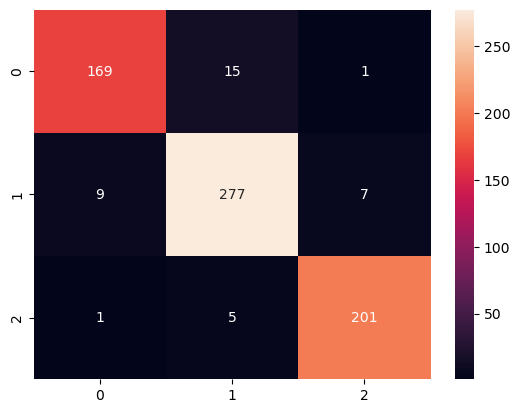

In [33]:
xscore = age_net_class.evaluate(x_test, y_test_class, verbose=0)
xscore=round(xscore[1],2)
# Print test accuracy
print(xscore * 100," %")


yhat = age_net_class.predict(x_test)
true_ages=y_test_class

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages, axis=1)
cm_class = confusion_matrix(y_test, y_pred)
print(cm_class)
print(yhat2.shape)
import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)





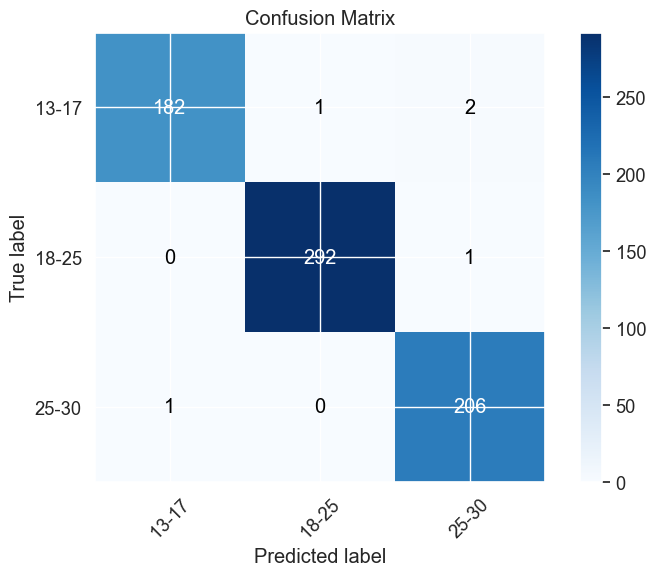

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the confusion matrix
data = np.array([[182, 1, 2],
                 [0, 292, 1],
                 [1, 0, 206]])

# Define class labels
labels = ['13-17', '18-25', '25-30']

# Create a figure and an axis for the plot
plt.figure(figsize=(8, 6))
plt.imshow(data, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add annotations to each cell
thresh = data.max() / 2.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, format(data[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if data[i, j] > thresh else "black")

# Set axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Display the plot
plt.tight_layout()
plt.show()


In [34]:
import sklearn

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       1.00      1.00      1.00       293
           2       0.99      1.00      0.99       207

    accuracy                           0.99       685
   macro avg       0.99      0.99      0.99       685
weighted avg       0.99      0.99      0.99       685



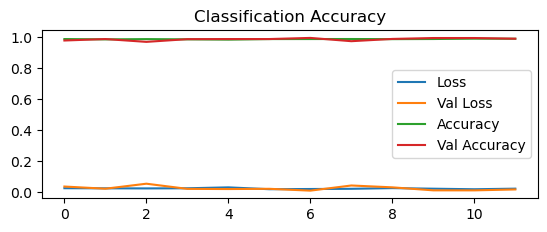

In [35]:
# plot loss during training
plt.subplot(211)
plt.title('Classification Loss')
plt.plot(model_history_z.history['loss'], label='Loss')
plt.plot(model_history_z.history['val_loss'], label='Val Loss')
plt.legend()

plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(model_history_z.history['accuracy'], label='Accuracy')
plt.plot(model_history_z.history['val_accuracy'], label='Val Accuracy')
plt.legend()
# plot accuracy during training

In [36]:
labels =[
    "(13-17)",# index 0
    "(18-25)" ,# index 1
        "(26-30)"# index 2     
        ]

# Classification model

22/22 [==============================] - 6s 254ms/step


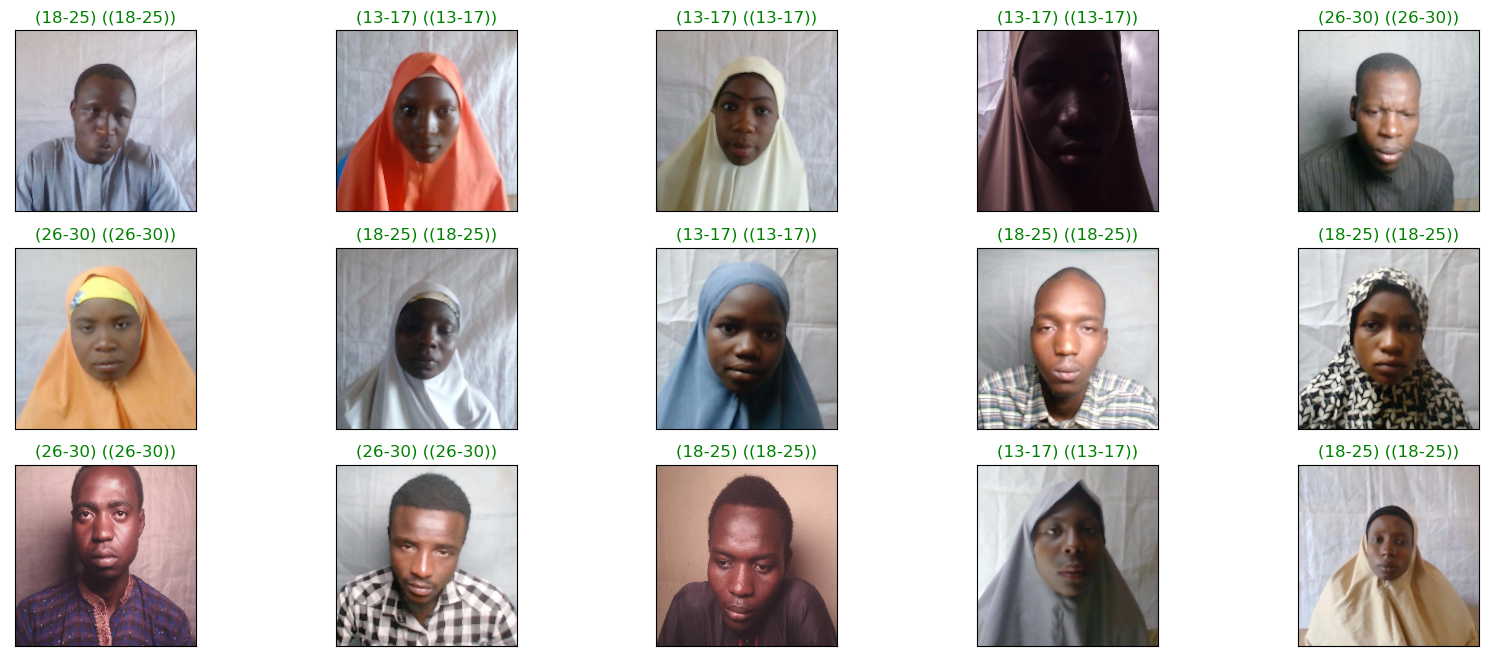

In [37]:
#CLASSIFICATION MODEL OUTPUT (98%)


y_hat = age_net_class.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

# Prediction Model

22/22 [==============================] - 3s 134ms/step


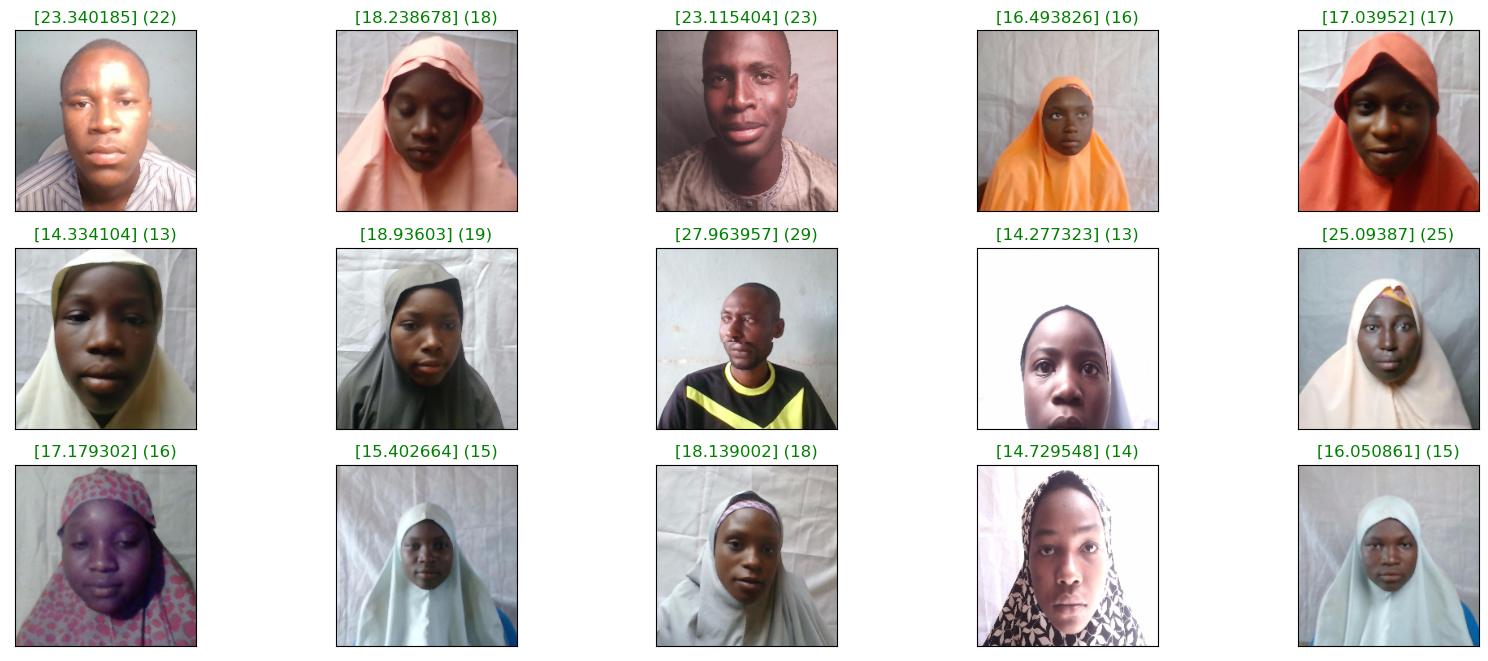

In [19]:
#PREDICTION MODEL ON TESTDATA (REGRESSION OUTPUT)

from keras.models import load_model
age_net_reg=load_model('/model/agenet_reg.h5')
y_hat = age_net_reg.predict(x_test)


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_reg[index]

    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()

# Combined Model

22/22 [==============================] - 6s 255ms/step


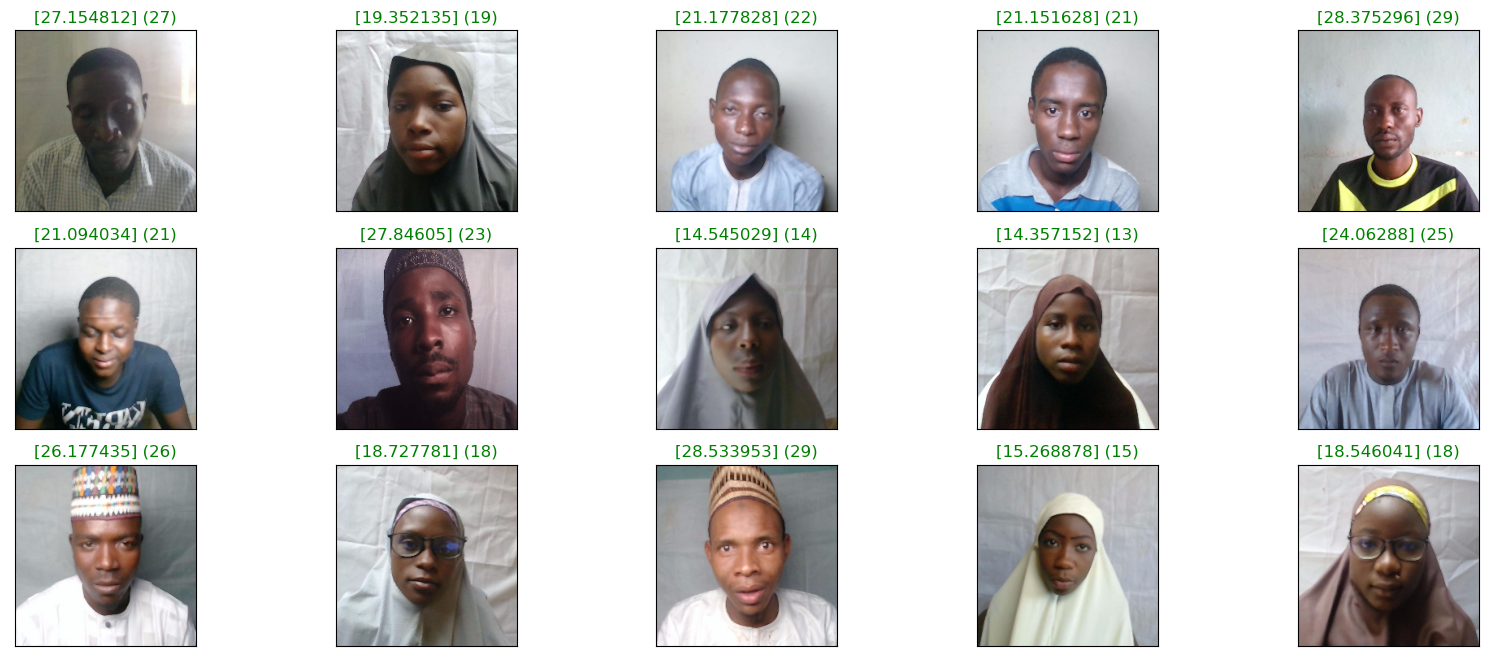

In [39]:
#combined Agenet




prediction,classification = age_net.predict(x_test)






# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = prediction[index]
    true_index = y_test_reg[index]
  # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()

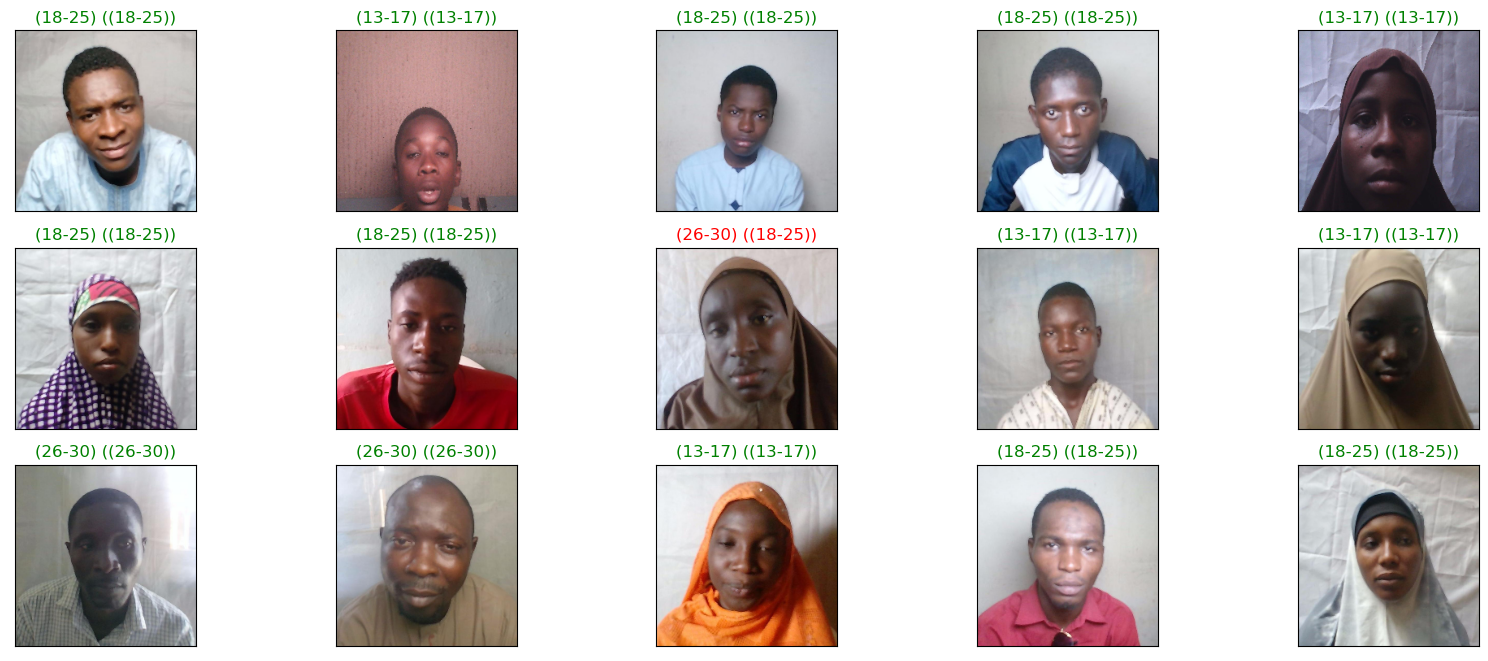

In [40]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(classification[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
#Regression Model Prediction

<AxesSubplot:>

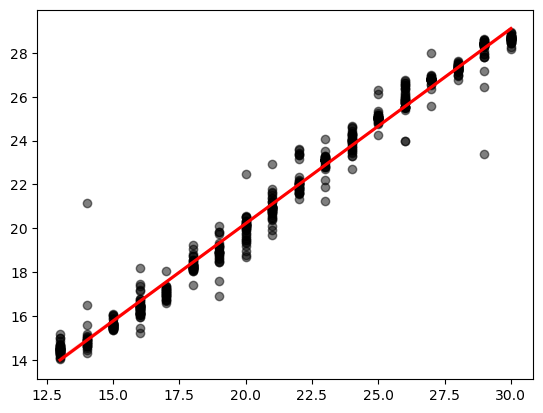

In [20]:
import seaborn as sns

sns.regplot(x = y_test_reg, y = y_hat,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level

In [23]:
#combined Regression and Classification
age_net=load_model('/model/agenet.h5')
prediction,classification = age_net.predict(x_test)

22/22 [==============================] - 3s 140ms/step


<AxesSubplot:>

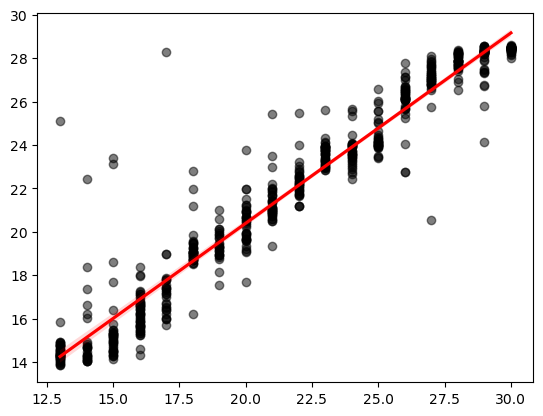

In [24]:

import seaborn as sns

sns.regplot(x = y_test_reg, y = prediction,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             